# Library Importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix 
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
import lightgbm as lgb
import xgboost as xgb
sns.set(style='white')

# Data Importation

In [2]:
file="Loan_Default.csv"
import chardet
with open(file,'rb') as rawdata:
  result=chardet.detect(rawdata.read(100000))
result
data=pd.read_csv(file,encoding='ISO-8859-1')

# Data Exploraion

In [3]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
data.shape

(252000, 13)

In [53]:
data.mean()

Id                   1.260005e+05
Income               4.997117e+06
Age                  4.995407e+01
Experience           1.008444e+01
Married/Single       8.979048e-01
House_Ownership      1.891722e+00
Car_Ownership        3.015873e-01
CURRENT_JOB_YRS      6.333877e+00
CURRENT_HOUSE_YRS    1.199779e+01
Risk_Flag            1.230000e-01
dtype: float64

In [7]:
data.std()

Id                   7.274628e+04
Income               2.878311e+06
Age                  1.706385e+01
Experience           6.002590e+00
CURRENT_JOB_YRS      3.647053e+00
CURRENT_HOUSE_YRS    1.399037e+00
Risk_Flag            3.284379e-01
dtype: float64

In [8]:
data.var()

Id                   5.292021e+09
Income               8.284674e+12
Age                  2.911751e+02
Experience           3.603108e+01
CURRENT_JOB_YRS      1.330100e+01
CURRENT_HOUSE_YRS    1.957304e+00
Risk_Flag            1.078714e-01
dtype: float64

In [9]:
data.mode(dropna=True)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,7936020.0,27.0,6.0,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,3.0,11.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251996,251997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251997,251998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251998,251999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
data.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [13]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [14]:
data.select_dtypes(include='object').nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [15]:
import re
import string
def cat_cleaner(text):
    text = text.lower()
    text = ''.join(re.findall(r'[a-zA-Z]+',text))
    return text
for i in data.select_dtypes(include='object').columns:
    data[i]=data[i].apply(cat_cleaner)
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,mechanicalengineer,rewa,madhyapradesh,3,13,0
1,2,7574516,40,10,single,rented,no,softwaredeveloper,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technicalwriter,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,softwaredeveloper,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civilservant,tiruchirappalli,tamilnadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,surgeon,kolkata,westbengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,armyofficer,rewa,madhyapradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,designengineer,kalyandombivli,maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,graphicdesigner,pondicherry,puducherry,0,10,0


# Data Visualization

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Married/Single'}>,
        <AxesSubplot:title={'center':'House_Ownership'}>],
       [<AxesSubplot:title={'center':'Car_Ownership'}>,
        <AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>],
       [<AxesSubplot:title={'center':'Risk_Flag'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

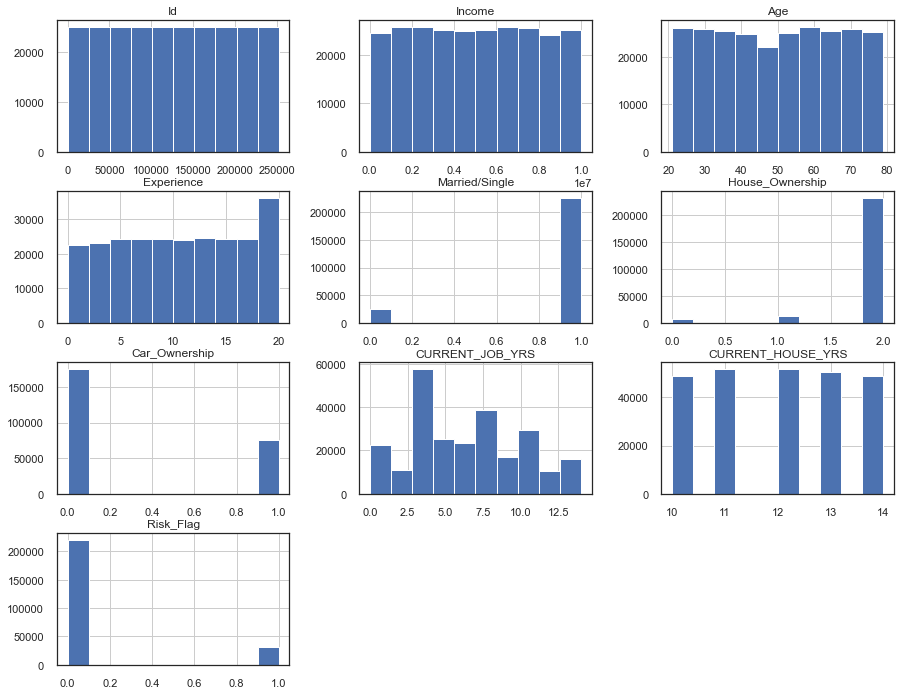

In [6]:
data.hist(figsize=(15,15),layout=(5,3))

<AxesSubplot:xlabel='Married/Single', ylabel='Experience'>

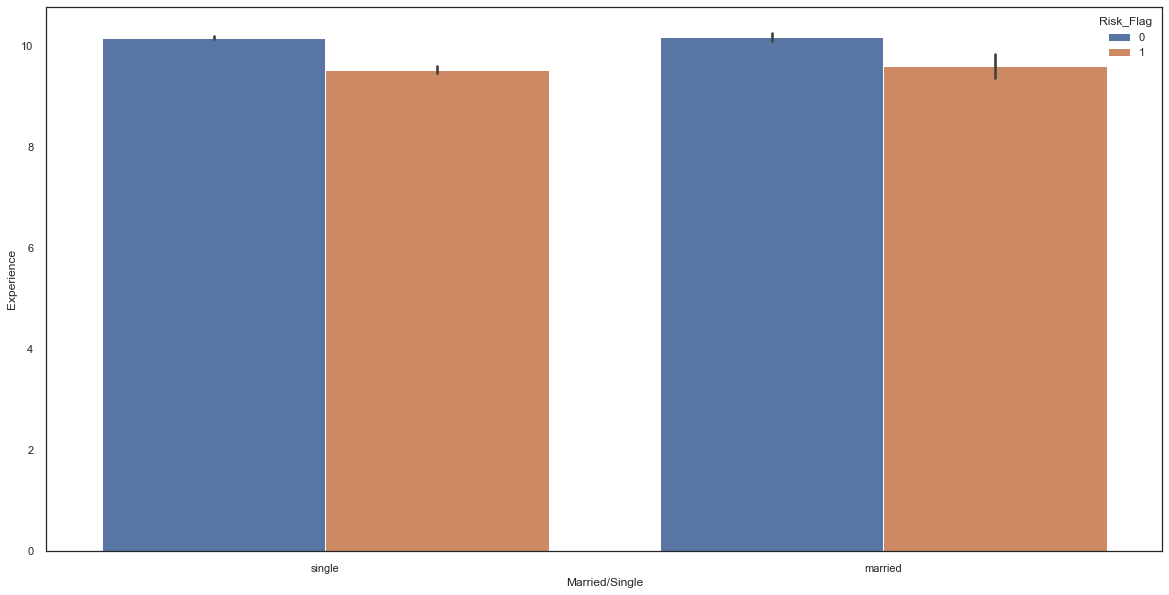

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Married/Single',y='Experience',hue='Risk_Flag')

<AxesSubplot:xlabel='Car_Ownership', ylabel='Age'>

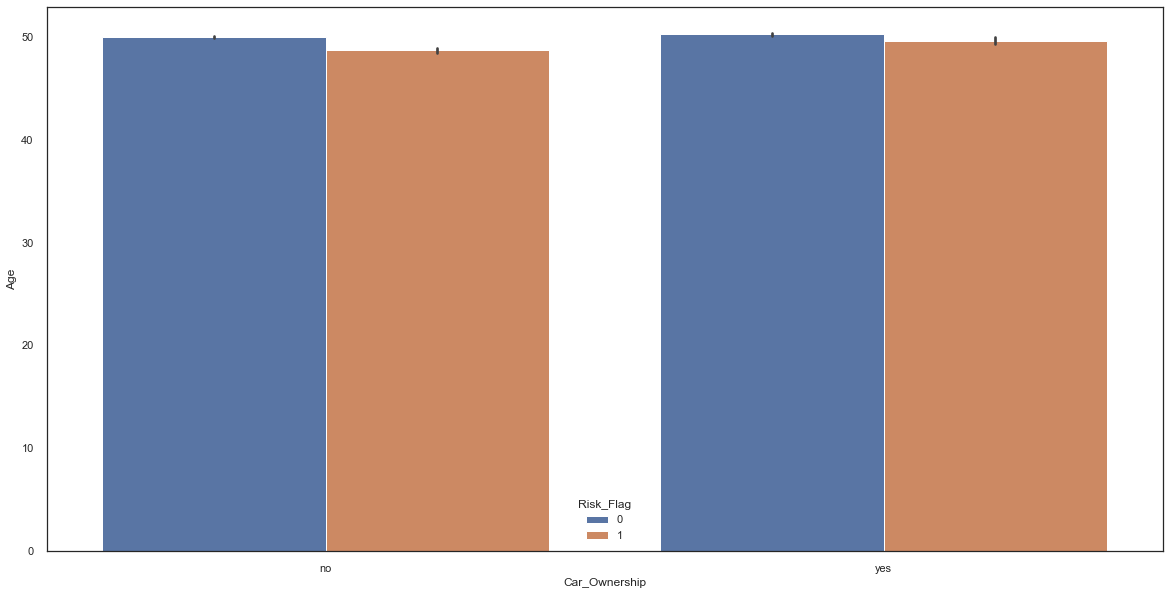

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Car_Ownership',y='Age',hue='Risk_Flag')

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

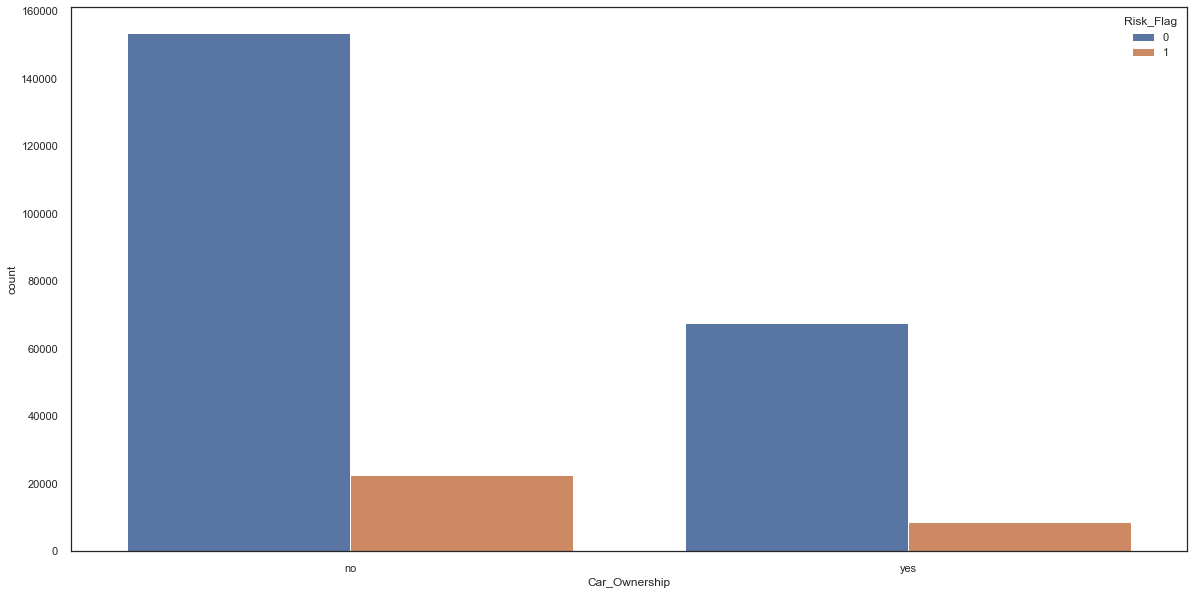

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Car_Ownership', hue='Risk_Flag',data=data)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

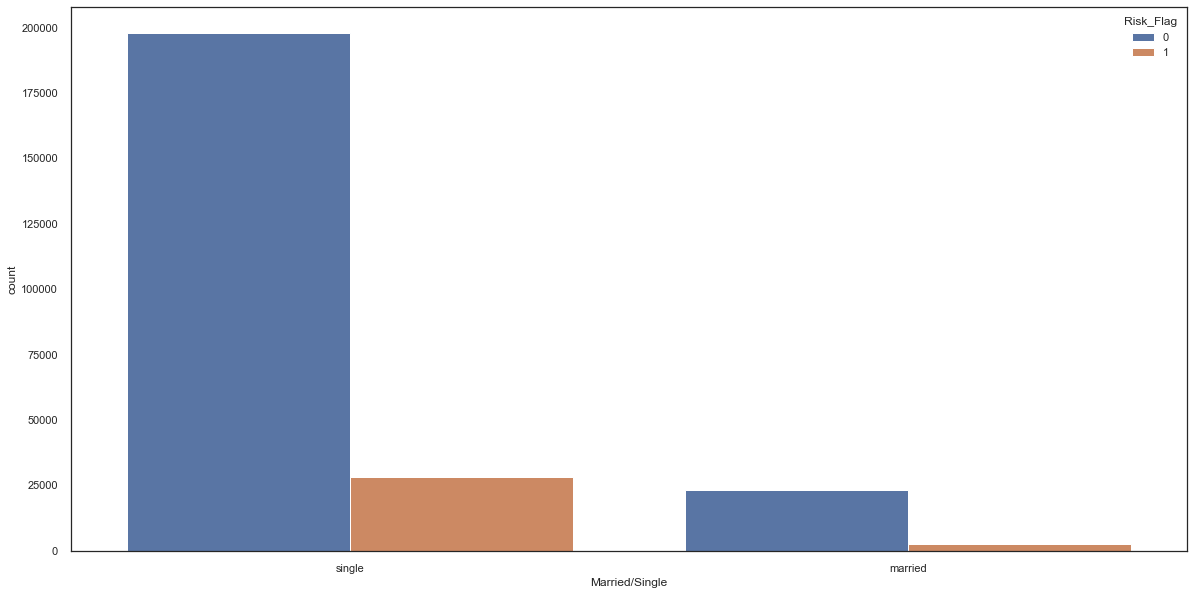

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Married/Single', hue='Risk_Flag',data=data)

<AxesSubplot:xlabel='Car_Ownership', ylabel='CURRENT_JOB_YRS'>

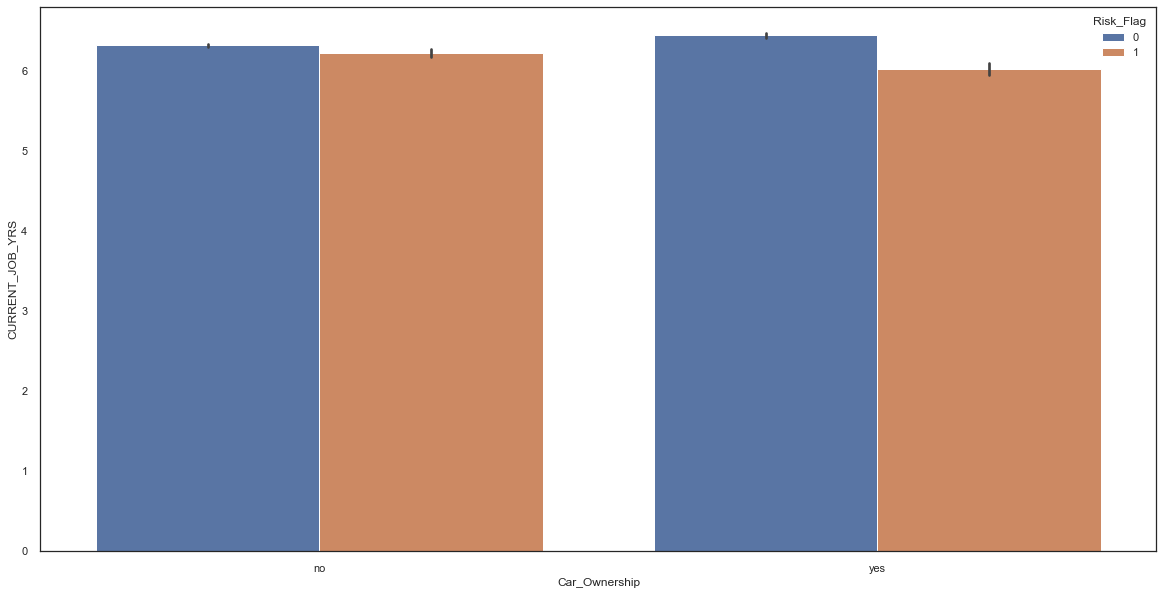

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='Car_Ownership',y='CURRENT_JOB_YRS',hue='Risk_Flag')

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

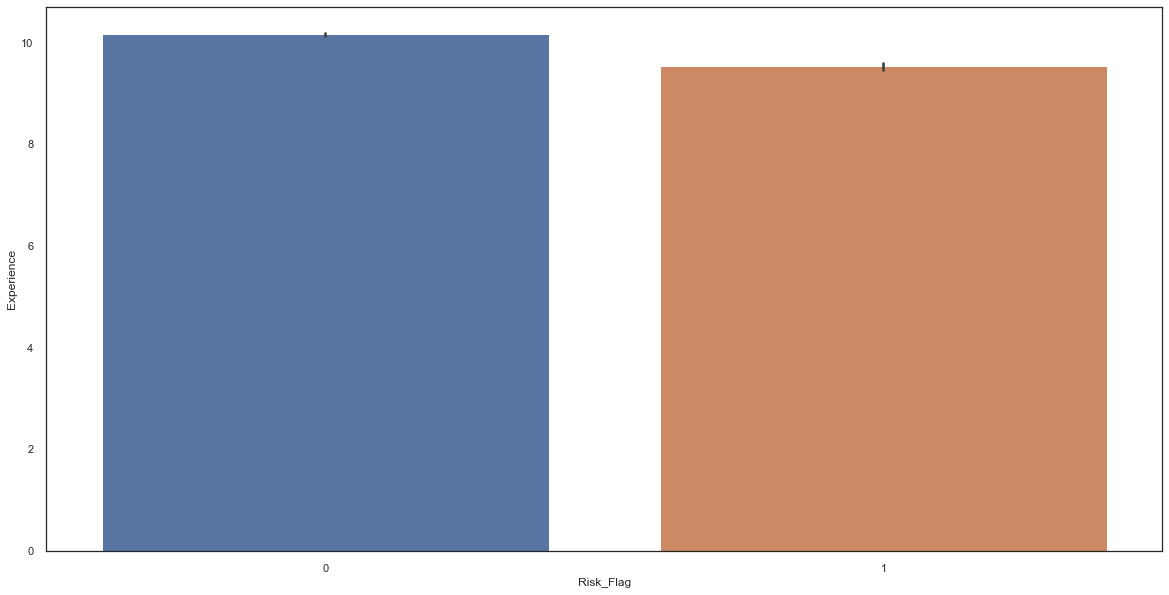

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,y='Experience',x='Risk_Flag')

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

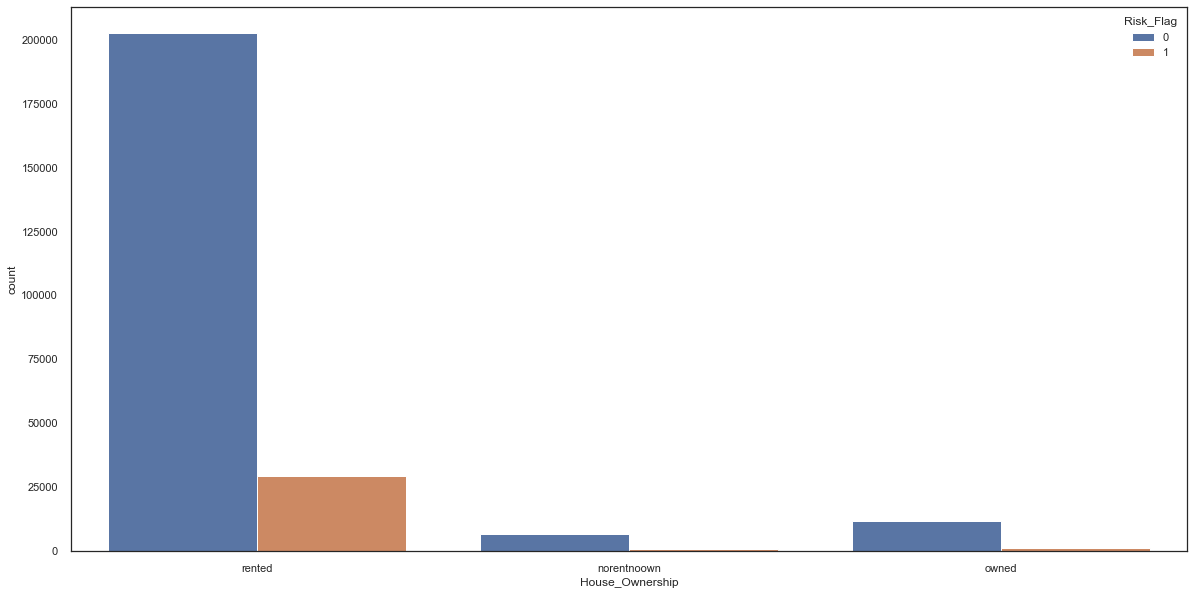

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='House_Ownership', hue='Risk_Flag',data=data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

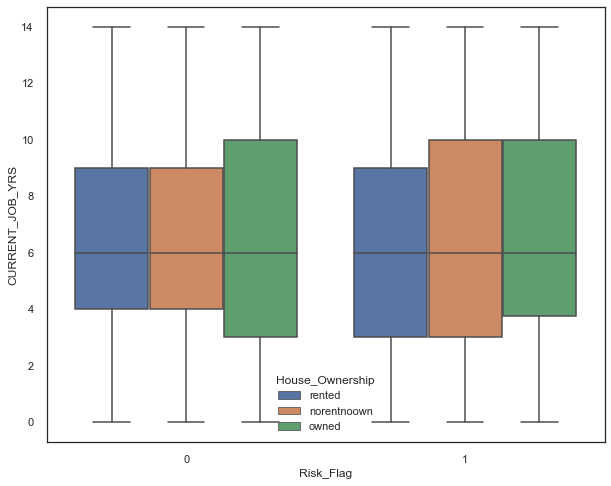

In [24]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

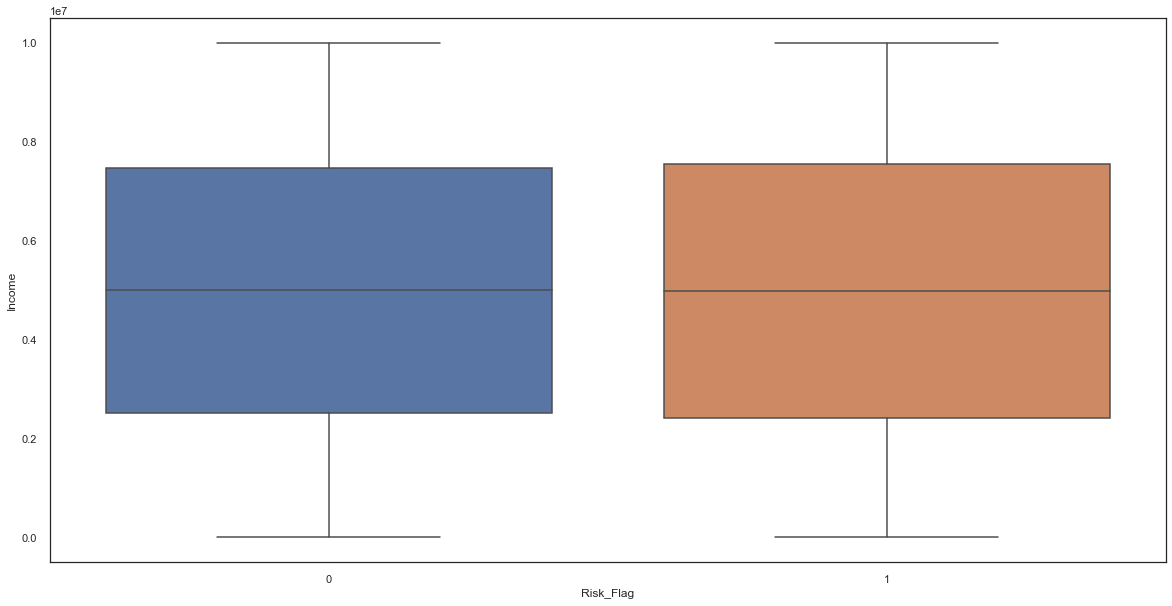

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

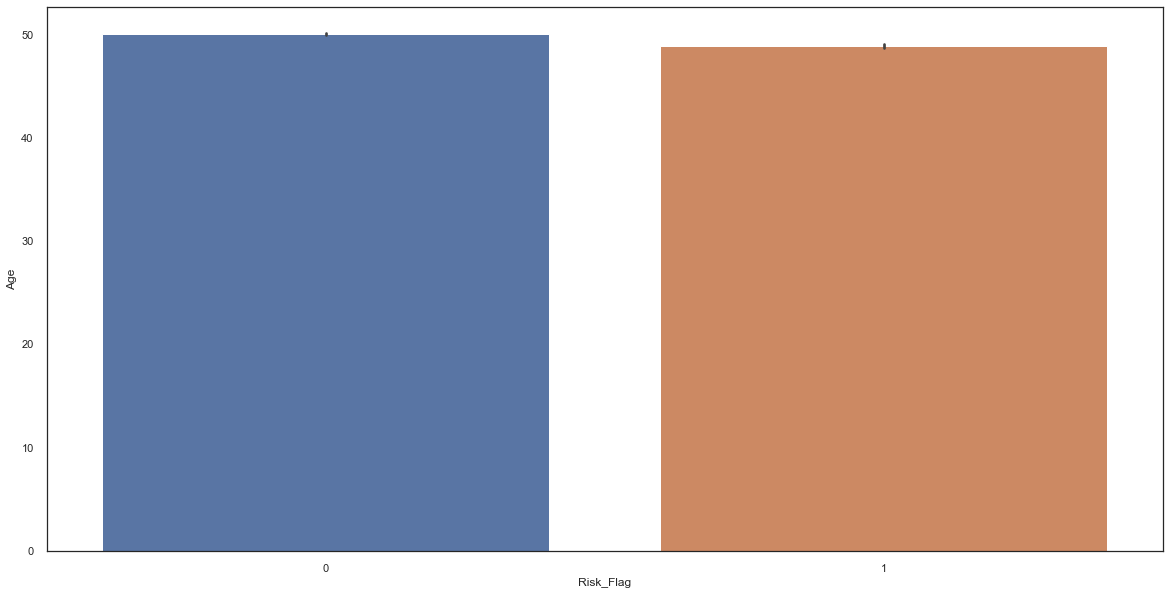

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,y='Age',x='Risk_Flag')

# Data Preprocessing

In [5]:
lb=LabelEncoder()
data['Married/Single']=lb.fit_transform(data['Married/Single'])
data['House_Ownership']=lb.fit_transform(data['House_Ownership'])
data['Car_Ownership']=lb.fit_transform(data['Car_Ownership'])
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0,2,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<AxesSubplot:>

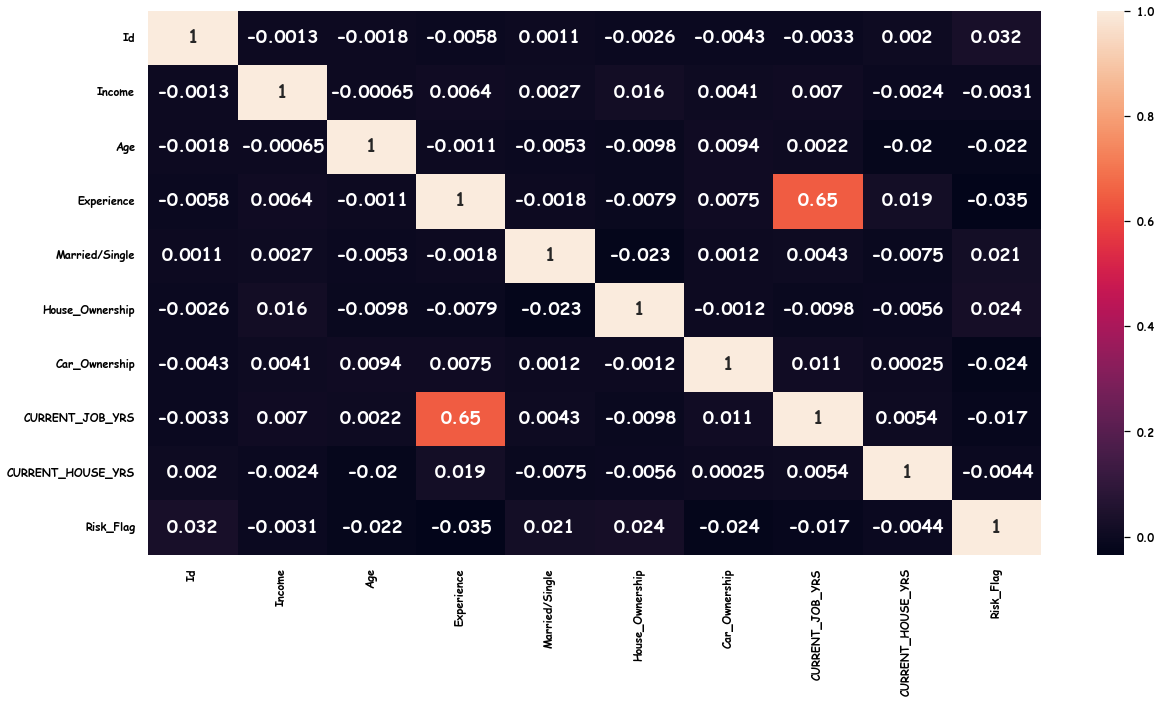

In [12]:
plt.rcParams['font.family']='cursive'
plt.rcParams['font.size']=18
plt.rc('axes',titlesize=40)
plt.rc('axes',labelsize=20)
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['font.weight']='bold'
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [28]:
convert = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession' ]
convert_data = pd.get_dummies(data[convert])
dt= pd.concat([data, convert_data], axis=1)
dt=dt.drop(['Profession', 'CITY', 'STATE'],axis=1)

In [29]:
dt

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,...,Profession_scientist,Profession_secretary,Profession_softwaredeveloper,Profession_statistician,Profession_surgeon,Profession_surveyor,Profession_technicalwriter,Profession_technician,Profession_technologyspecialist,Profession_webdesigner
0,1,1303834,23,3,1,2,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,1,2,0,9,13,0,...,0,0,1,0,0,0,0,0,0,0
2,3,3991815,66,4,0,2,0,4,10,0,...,0,0,0,0,0,0,1,0,0,0
3,4,6256451,41,2,1,2,1,2,12,1,...,0,0,1,0,0,0,0,0,0,0
4,5,5768871,47,11,1,2,0,3,14,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,6,11,0,...,0,0,0,0,1,0,0,0,0,0
251996,251997,2843572,26,10,1,2,0,6,11,0,...,0,0,0,0,0,0,0,0,0,0
251997,251998,4522448,46,7,1,2,0,7,12,0,...,0,0,0,0,0,0,0,0,0,0
251998,251999,6507128,45,0,1,2,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection and Data Splitting

In [30]:
x = dt.drop(['Risk_Flag'],axis=1)
y = dt.Risk_Flag

# Data Resampling

In [31]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [32]:
scaled = StandardScaler()
x_resampled = scaled.fit_transform(x_resampled)

In [33]:
u,v=np.unique(y_resampled,return_counts=True)
for x in range(len(u)):
  print(u[x],'=',v[x])

0 = 221004
1 = 221004


In [34]:
x_train_resampled,x_test,y_train_resampled,y_test=train_test_split(x_resampled,y_resampled,test_size=.3,random_state=42)

# Model Development and Evaluation

In [35]:
rf_model=RandomForestClassifier()
rf_model=rf_model.fit(x_train_resampled,y_train_resampled)
y_pred_rf=rf_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_rf))
print('Recall:',recall_score(y_test,y_pred_rf))
print('Precision:',precision_score(y_test,y_pred_rf))
print('F1-score:',f1_score(y_test,y_pred_rf))

Accuracy: 0.9482892543909263
Recall: 0.9412717147872405
Precision: 0.9543411221405668
F1-score: 0.9477613645886501


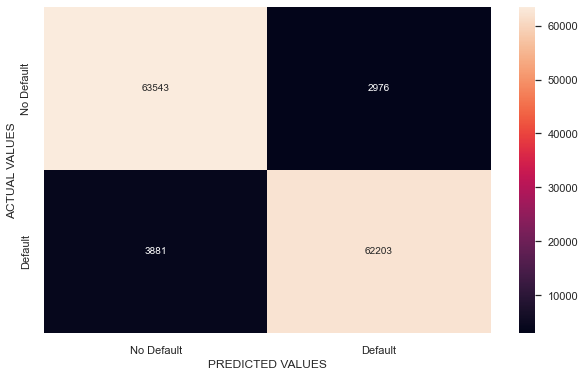

In [36]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

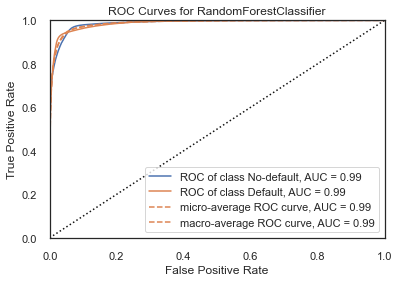

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'], estimator=RandomForestClassifier())

In [37]:
roc_auc(rf_model, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])

In [38]:
ada_model=AdaBoostClassifier()
ada_model=ada_model.fit(x_train_resampled,y_train_resampled)
y_pred_ada=ada_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_ada))
print('Recall:',recall_score(y_test,y_pred_ada))
print('Precision:',precision_score(y_test,y_pred_ada))
print('F1-score:',f1_score(y_test,y_pred_ada))

Accuracy: 0.7510689803398113
Recall: 0.7544488832395133
Precision: 0.7481654886778013
F1-score: 0.751294048507041


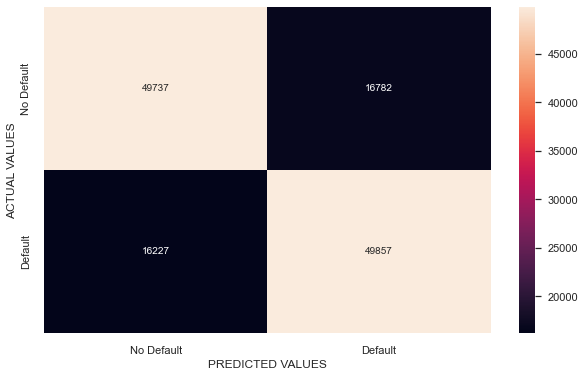

In [39]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_ada),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

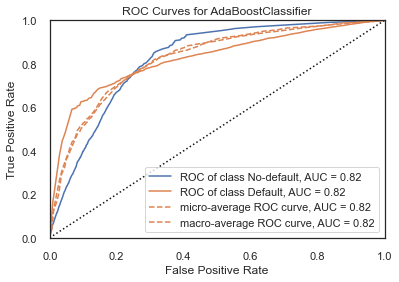

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'], estimator=AdaBoostClassifier())

In [40]:
roc_auc(ada_model, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])

In [41]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_xgb))
print('Recall:',recall_score(y_test,y_pred_xgb))
print('Precision:',precision_score(y_test,y_pred_xgb))
print('F1-score:',f1_score(y_test,y_pred_xgb))

Accuracy: 0.9254692578599277
Recall: 0.9067853035530536
Precision: 0.9415054912250381
F1-score: 0.9238192876028088


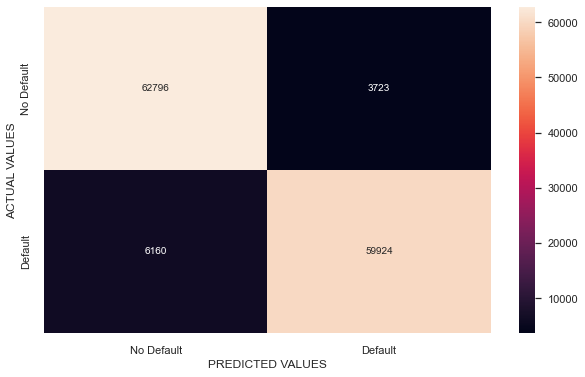

In [42]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

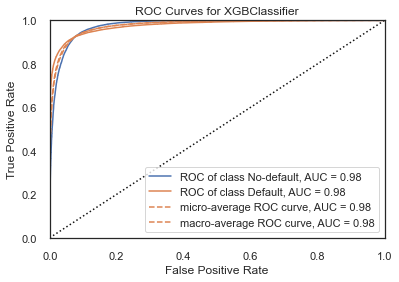

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'],
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))

In [43]:
roc_auc(xgb_model, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])

In [44]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train_resampled, y_train_resampled)
y_pred_lgb = lgb_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_lgb))
print('Recall:',recall_score(y_test,y_pred_lgb))
print('Precision:',precision_score(y_test,y_pred_lgb))
print('F1-score:',f1_score(y_test,y_pred_lgb))

Accuracy: 0.8595808541284888
Recall: 0.7669632588826342
Precision: 0.9402641733452063
F1-score: 0.8448178151148448


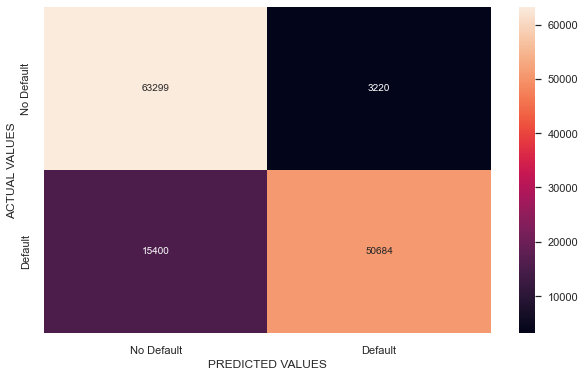

In [45]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_lgb),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

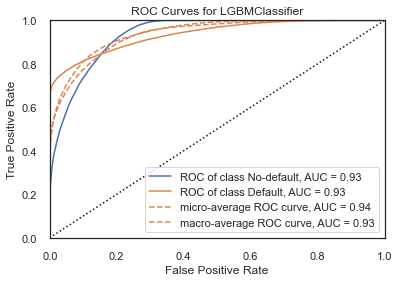

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'], estimator=LGBMClassifier())

In [46]:
roc_auc(lgb_model, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])

In [47]:
bg=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=20)
bg.fit(x_train_resampled,y_train_resampled)
bg_pred=bg.predict(x_test)
print('Accuracy:',accuracy_score(y_test,bg_pred))
print('Recall:',recall_score(y_test,bg_pred))
print('Precision:',precision_score(y_test,bg_pred))
print('F1-score:',f1_score(y_test,bg_pred))

Accuracy: 0.9366153103625107
Recall: 0.923218933478603
Precision: 0.9482289675323666
F1-score: 0.9355568334291737


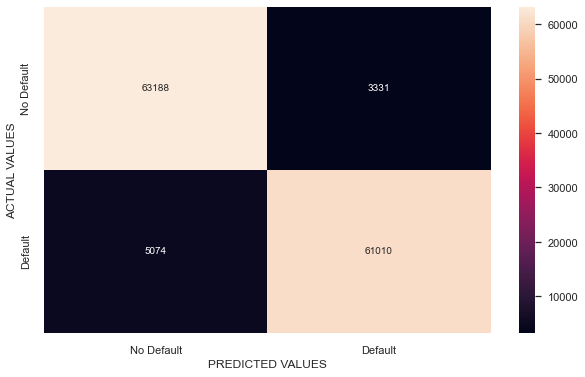

In [48]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,bg_pred),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

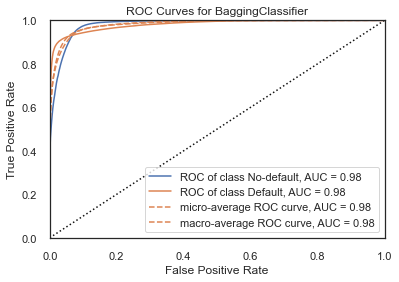

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'],
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=100, random_state=20))

In [49]:
roc_auc(bg, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])

In [50]:
gb=GradientBoostingClassifier()
gb.fit(x_train_resampled,y_train_resampled)
gb_pred=gb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,gb_pred))
print('Recall:',recall_score(y_test,gb_pred))
print('Precision:',precision_score(y_test,gb_pred))
print('F1-score:',f1_score(y_test,gb_pred))

Accuracy: 0.7533841617459636
Recall: 0.7728345741783185
Precision: 0.7427358133853
F1-score: 0.7574863177254053


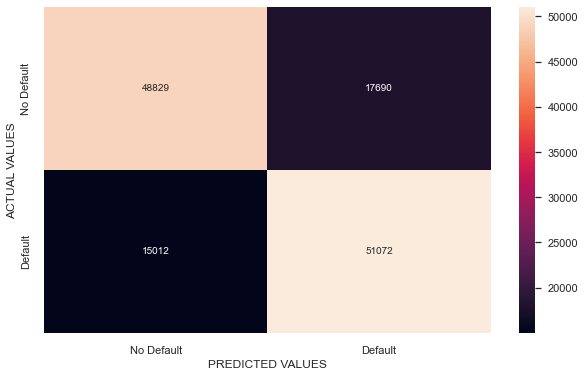

In [51]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,fmt='.0f')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['No Default', 'Default'])
fx.yaxis.set_ticklabels(['No Default', 'Default'])
plt.show()

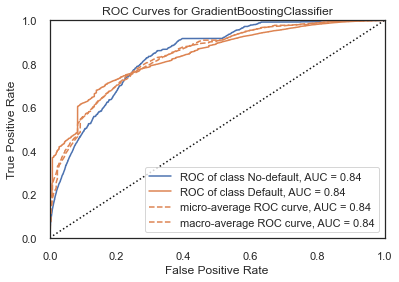

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No-default', 'Default'],
       estimator=GradientBoostingClassifier())

In [52]:
roc_auc(gb, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['No-default','Default'])